# Noah Stasuik

## Research question/interests

I'm interested in exploring how a parent's education level affects their child's results on standardized exams. This is an important question to research since it could prove if someone's parents having a formal education gives an unfair advantage regarding standardized testing. Many universities around the world rely on standardized testing to determine acceptance. By selecting this research question, I will be able to find if there are biases that exist when it comes to standardized testing.

If I have the chance, I will also examine if the connection between standardized testing and parental education varies based on the subject being tested.

In [66]:
import pandas as pd
import numpy as np

In [67]:
df = pd.read_csv('../data/raw/exams.csv')

In [68]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


The four columns that I am going to primarily use in my data analysis are the 'parental level of education' column in connection to the 'math score', 'reading score', and 'writing score' columns.

    1. Parental Level of Education
        - This column gives information about a student's parents education, I will be looking for a connection between this and the different  test scores. The six options for this piece of information, ranging from least education to most education are some highschool, highschool, some college, associate's degree, 'bachelor's degree and master's degree.
        
    2. Math Score
        - This score is based on a generic Math test that students had to take, so that they could recieve a grade for their math skills the scores can range from 0-100 depending on how the student perfromed on the test.
        
    3. Reading Score
        - This score is based on a generic Reading test that students had to take, so that they could recieve a grade for their reading skills the scores can range from 0-100 depending on how the student perfromed on the test.
        
    4. Writing Score
        - This score is based on a generic Writing test that students had to take, so that they could recieve a grade for their writing skills the scores can range from 0-100 depending on how the student perfromed on the test.

## Task 1 - Milestone 3 (Exploritory Data Analysis on the data set) + Task 2 Analysis Pipeline

I will start my EDA by removing the columns I won't need for the analysis and changing some of the columns that involve words to have numbers so that the correlations will be more accurate. For example, I ranged 'some high school' to 'master's degree' in its column ranging from 1 to 6.

I am also adding a column for the average score to look into general results instead of math, reading and writing scores separately.

In [69]:
cols = list(df.columns)
df = df[cols[2:3] + cols[5:8]]
df = df.dropna(axis=0)
df['average score'] = round((df['math score'] + df['reading score'] + df['writing score']) /3, 2)
df['parental education#'] = df['parental level of education']
df['parental education#'] = df['parental education#'].replace(['some high school', 'high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree'], [1, 2, 3, 4, 5, 6])
df

,parental level of education,math score,reading score,writing score,average score,parental education#
0,high school,67,67,63,65.67,2
1,some high school,40,59,55,51.33,1
2,some college,59,60,50,56.33,3
3,high school,77,78,68,74.33,2
4,associate's degree,78,73,68,73.00,4
...,...,...,...,...,...,...
995,high school,73,70,65,69.33,2
996,associate's degree,85,91,92,89.33,4
997,some high school,32,35,41,36.00,1
998,some college,73,74,82,76.33,3


In [70]:
import seaborn as sns
print(df.describe())

        math score  reading score  writing score  average score  \
count  1000.000000    1000.000000    1000.000000    1000.000000   
mean     66.396000      69.002000      67.738000      67.712000   
std      15.402871      14.737272      15.600985      14.514123   
min      13.000000      27.000000      23.000000      21.670000   
25%      56.000000      60.000000      58.000000      58.585000   
50%      66.500000      70.000000      68.000000      67.330000   
75%      77.000000      79.000000      79.000000      78.330000   
max     100.000000     100.000000     100.000000     100.000000   

       parental education#  
count          1000.000000  
mean              3.053000  
std               1.498812  
min               1.000000  
25%               2.000000  
50%               3.000000  
75%               4.000000  
max               6.000000  


To get a baseline understanding of my data, I used the described method to gain some insight into my data.

In beginning my EDA, I figured out how to develop practical ways to plot the data I was working with for the project. 

In [71]:
list(df['parental level of education'].unique())

['high school',
 'some high school',
 'some college',
 "associate's degree",
 "bachelor's degree",
 "master's degree"]

##### Here I am running the .unique() method just to make sure that the dataset I am working with does not contain empty cells, making my analysis much more accurate!

,math score,reading score,writing score,average score,parental education#
math score,1.000000,0.819398,0.805944,0.919836,0.229113
reading score,0.819398,1.000000,0.954274,0.970217,0.224410
writing score,0.805944,0.954274,1.000000,0.966366,0.267894
average score,0.919836,0.970217,0.966366,1.000000,0.252994
parental education#,0.229113,0.224410,0.267894,0.252994,1.000000


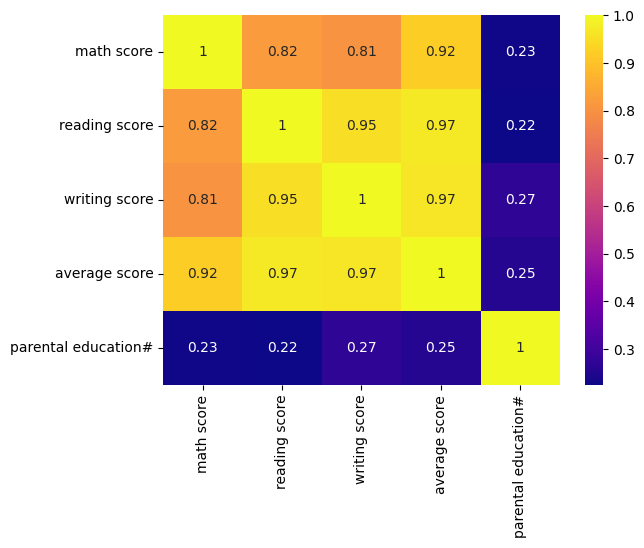

In [72]:
df1 = df
df1 = df1.drop(columns=['parental level of education'])
sns.heatmap(df1.corr(), annot=True, cmap='plasma')
df1.corr()

Before deciding on my charting method for my research, I created a heatmap to see the correlation between all the variables I will be using to conduct my research. Using the heatmap, I can make an educated decision on how to properly plot / represent my data. The heatmap shows a strong correlation between how students perform in their classes, with all those correlations above 0.8, which is relatively high. Using the mean for my data analysis will be a sound way of collecting my data. Since the numbers for the parental level of education represent various stages of education, the heatmap doesn't tell me too much about the correlation between education and grades; from what I can gather, a chart such as a barplot will work well in my current position.

I am now going to try more ways of visualizing my data and then comment on them below!

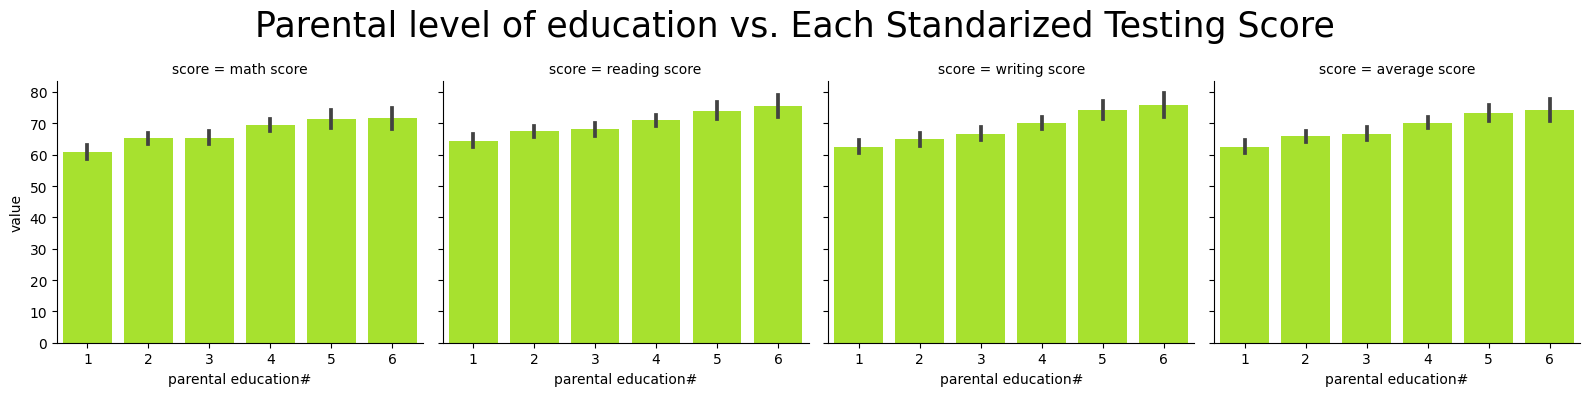

In [85]:
df2 = df.drop(columns = ['parental level of education'])
df2 = pd.melt(df2, id_vars="parental education#", var_name="score")
merge = sns.FacetGrid(df2, col="score",height=4,aspect=1)
merge.map(sns.barplot,"parental education#","value", order=[1,2,3,4,5,6], color="#B2FF11")
merge.fig.suptitle("Parental level of education vs. Each Standarized Testing Score",fontsize=25)
merge.fig.subplots_adjust(top=0.8)

From graphing all of the different barplots side by side for math score, reading score, and writing score, side by side it is very evidet that higher levels of parental education lead to higher grades on the different examinations. 

- The numbers for parental education 1: some highschool, 2: highschool, 3: some college 4: associate's degree 5: bachelor's degree 6: master's degree 

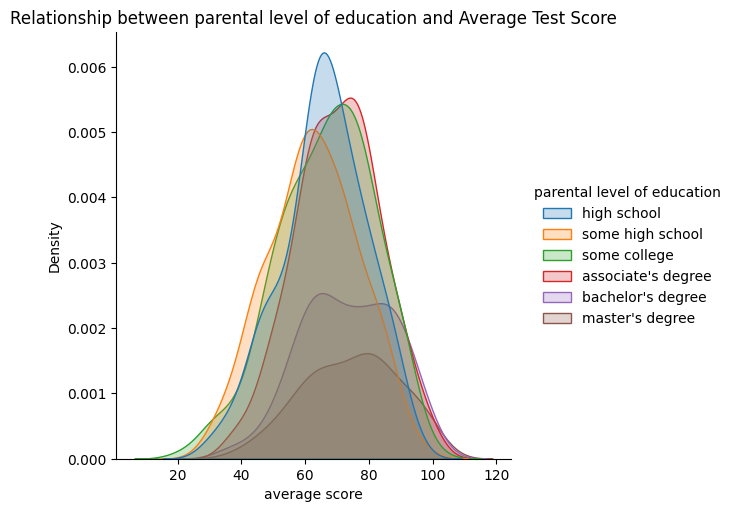

In [12]:
sns.displot(df, x="average score", hue="parental level of education", kind="kde", fill=True).set(title="Relationship between parental level of education and Average Test Score")

From the KDE plot I can also see that the more education that a student's parent has the better they perform on standardized tests. Another thing that is interesting to see from this visualization is that as the parental level of education increases, the amount of data decreases, so there is more data for student's who's parents are less educated, which could play a role in the results collected from the data.

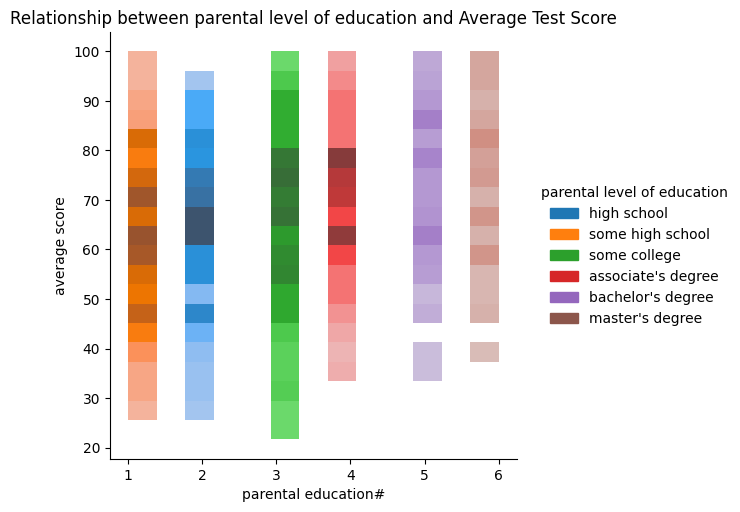

In [13]:
sns.displot(df, x='parental education#', y="average score", hue="parental level of education").set(title="Relationship between parental level of education and Average Test Score")

### In my Exploratory data analysis it is becoming evident that the barplot is a very useful tool in visualizing my data.

##### As I assumed the parental education did have an effect on the test scores, which the data visualizations seem to confirm.

Similar to how I estimated above, after analyzing the correlation between the variables, I'm looking at the student's average scores versus the scores individually; there is almost no difference. After using the barplot to confirm that the average score would be an acceptable way to examine the relationship between the parental level of education and students' test scores, I used a few displot to show the correlations in a few different visualizations.

Also, just after plotting a couple of bar charts, it is now evident that there exists a relationship between the parental level of education and students' outcome on exams, meaning that there is a good chance that biases do indeed live in a world of standardized testing.


# Task 3: Doing everything above, but now with method chaining.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

def load_and_process_before(filename ='../data/raw/exams.csv'):
    df1 = pd.read_csv(filename)
    df1 = (
        pd.read_csv(filename)
        .drop(columns = ['gender','lunch','race/ethnicity', 'test preparation course'])
        .assign(average_score = round((df1['math score'] + df1['reading score'] + df1['writing score']) /3, 2))
        .dropna()  
        .assign(parental_education_n = df1['parental level of education'].replace(['some high school', 'high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree'], [1, 2, 3, 4, 5, 6]))
    )
    return df1

df = load_and_process_before()
df

,parental level of education,math score,reading score,writing score,average_score,parental_education_n
0,high school,67,67,63,65.67,2
1,some high school,40,59,55,51.33,1
2,some college,59,60,50,56.33,3
3,high school,77,78,68,74.33,2
4,associate's degree,78,73,68,73.00,4
...,...,...,...,...,...,...
995,high school,73,70,65,69.33,2
996,associate's degree,85,91,92,89.33,4
997,some high school,32,35,41,36.00,1
998,some college,73,74,82,76.33,3


In [15]:
from project_functions1 import load_and_process
load_and_process()


,parental level of education,math score,reading score,writing score,average_score,parental_education_n
0,high school,67,67,63,65.67,2
1,some high school,40,59,55,51.33,1
2,some college,59,60,50,56.33,3
3,high school,77,78,68,74.33,2
4,associate's degree,78,73,68,73.00,4
...,...,...,...,...,...,...
995,high school,73,70,65,69.33,2
996,associate's degree,85,91,92,89.33,4
997,some high school,32,35,41,36.00,1
998,some college,73,74,82,76.33,3


Here is the process where I created my load and process function; I am leaving it in my notebook to show how I set it up before moving it to the project_functions1.py file. After this, I imported the function I created and tested it to ensure it worked as needed.

**Side note:** Though my project function load_and_process is short, the reason is that the dataset is already relatively clean and did not require much manipulation to get it into working condition.

# Task 4 (Overall Analysis after Milestone 3)

After conducting my first EDA and going through the steps of a Data Analysis Pipeline, I have found a correlation between the parental level of education and how their children perform on standardized testing in various subjects. It is evident from the charts backed up by the heatmap I explored in my EDA that exploring the average score is a fair way of going about my data analysis. From looking and the relationship between students' average scores and parental level of education, I saw that the more education their parents have correlated with a higher score in math, reading and writing. This was especially evident when looking at the individual bar plots.

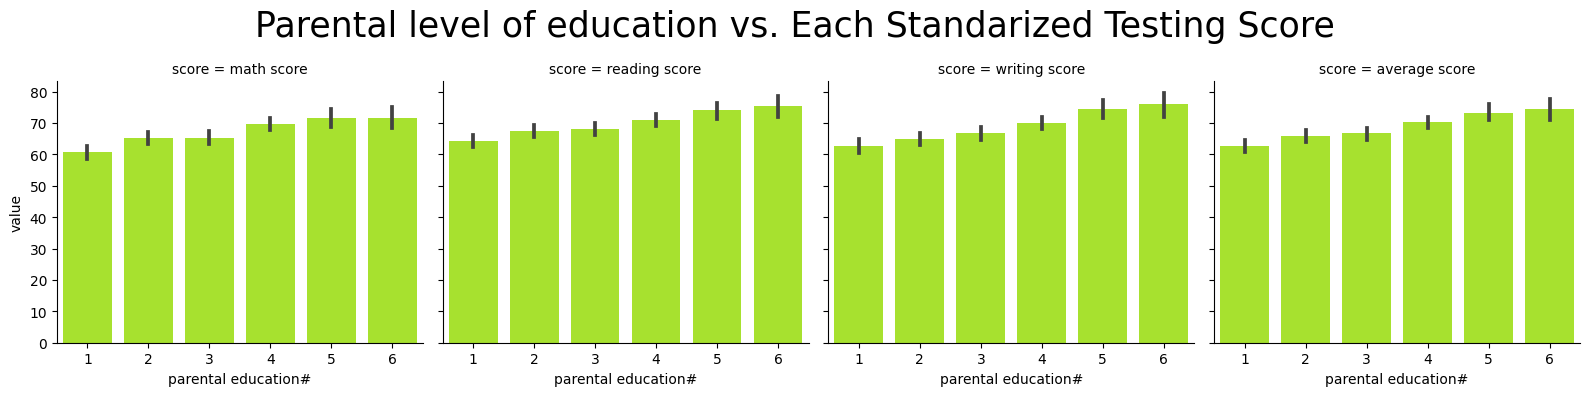

In [86]:
merge = sns.FacetGrid(df2, col="score",height=4,aspect=1)
merge.map(sns.barplot,"parental education#","value", order=[1,2,3,4,5,6], color="#B2FF11")
merge.fig.suptitle("Parental level of education vs. Each Standarized Testing Score",fontsize=25)
merge.fig.subplots_adjust(top=0.8)

From this, standardized testing, such as the test that the students took in collecting this data, is indeed biased because there are factors outside of the student's control that affect how they perform on tests. While factors that I did not explore, such as studying, are in students' control and may help them to achieve better on standardized exams, my data analysis shows that their parent's level of education plays a significant role in how they perform. This is especially evident in comparing how the students whose parents did not graduate high school did, compared to students whose parents achieved a master's degree, where the grade difference is over 10%! As many of us know, applications for programs from university acceptance and scholarships often require grades into the 90s, so that 10% difference will cut out many people merely because they come from different backgrounds.

This data analysis has been fascinating in exploring the relationship between student test scores and parent level of education. It has proved that a relationship exists between the two variables.

In [ ]:
df.to_csv("../data/processed/analysis1.csv")